# Introduction

Today's dataset comes from the UCI Machine Learning Repository and is a set of data on [Online News Popularity](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) for articles shared on Mashable.

The dataset can be found in this repository (`datasets/OnlineNewsPopularity.csv`) and the codebook can be found within the `datasets` folder as well (or online [here](https://git.generalassemb.ly/DSI-EAST-1/lab-feature-selection-grid-search/blob/master/datasets/OnlineNewsPopularity.names).) However, you will not need to have intimate domain knowledge to create a great model!

## Question 1: EDA

For this step, do the following:
- Import the data in `datasets/OnlineNewsPopularity.csv`
- Use methods like `.describe()` and `.info()` to identify if there is any missing data and any non-numeric data
- Print out the results of `df.columns` -- are these names formatted correctly?
- Drop any columns that do not contain numeric values
- Drop or impute any missing data
- Recode the `shares` column (your target) to be 1 if shares is >= 1500 and 0 otherwise

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression

In [28]:
df = pd.read_csv('datasets/OnlineNewsPopularity.csv')

In [29]:
df.isnull().count()
# there are no null values

url                               39644
 timedelta                        39644
 n_tokens_title                   39644
 n_tokens_content                 39644
 n_unique_tokens                  39644
 n_non_stop_words                 39644
 n_non_stop_unique_tokens         39644
 num_hrefs                        39644
 num_self_hrefs                   39644
 num_imgs                         39644
 num_videos                       39644
 average_token_length             39644
 num_keywords                     39644
 data_channel_is_lifestyle        39644
 data_channel_is_entertainment    39644
 data_channel_is_bus              39644
 data_channel_is_socmed           39644
 data_channel_is_tech             39644
 data_channel_is_world            39644
 kw_min_min                       39644
 kw_max_min                       39644
 kw_avg_min                       39644
 kw_min_max                       39644
 kw_max_max                       39644
 kw_avg_max                       39644


In [30]:
df.columns = [x.strip() for x in df.columns]
df = df.drop('url',axis=1)

In [31]:
df['shares'] = df['shares'].apply(lambda x: 1 if x >=1500 else 0)

In [32]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


## Question 2: Correlation Table

Use Seaborn and pandas to create a correlation heatmap. What patterns are apparent to you? Is this easy to use or too cluttered to make sense of?

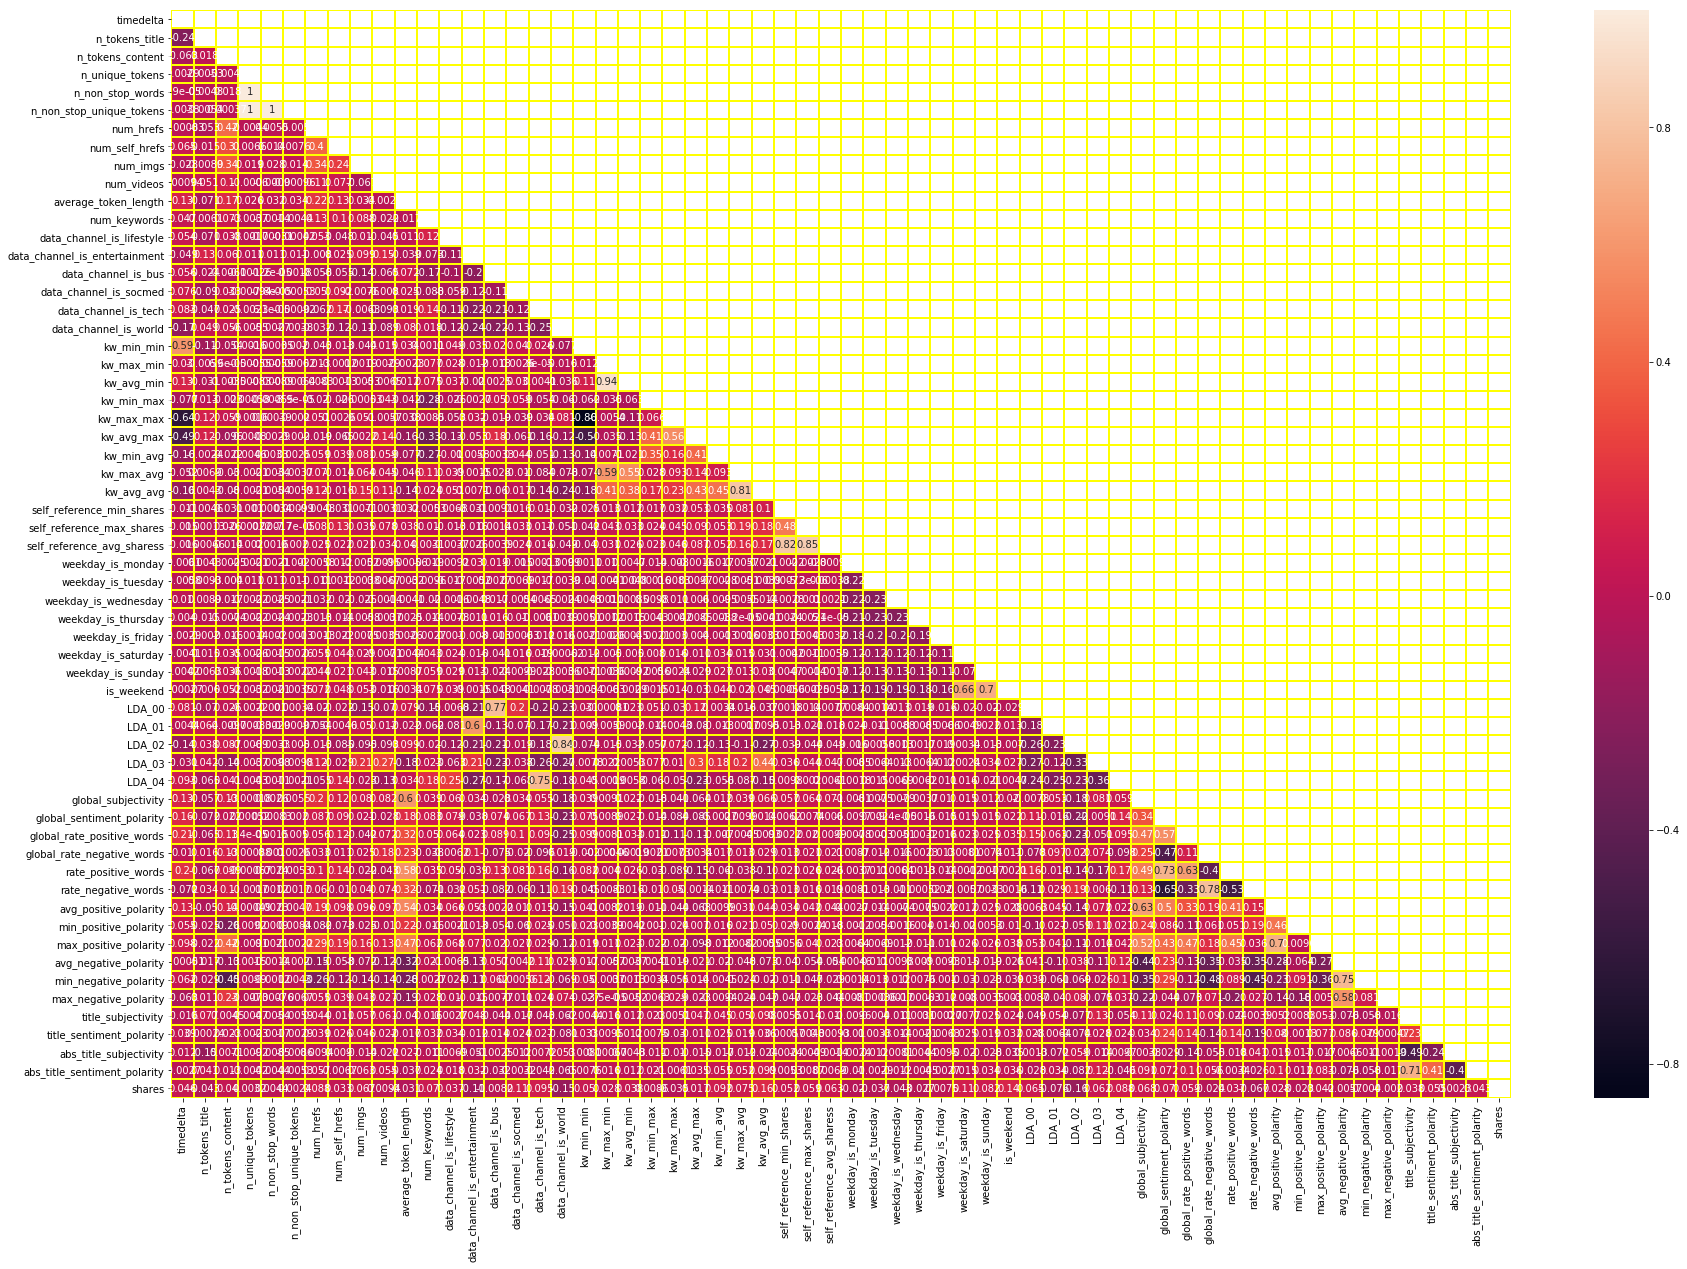

In [37]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(30,20))

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, annot=True, linewidths=1, linecolor='yellow', mask=mask, ax=ax)

In [40]:
df_corr.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.045696
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,-0.043492
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.040331
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.003226
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.004437


In [48]:
df.corr()['shares'].apply(lambda x: abs(x)).sort_values(ascending=False).head(25)

shares                           1.000000
kw_avg_avg                       0.162057
LDA_02                           0.156471
data_channel_is_world            0.150726
is_weekend                       0.137616
data_channel_is_entertainment    0.110558
data_channel_is_socmed           0.110144
weekday_is_saturday              0.106713
data_channel_is_tech             0.095336
kw_min_avg                       0.092386
num_hrefs                        0.088362
LDA_04                           0.087811
weekday_is_sunday                0.081684
LDA_01                           0.075640
kw_max_avg                       0.074773
num_keywords                     0.069840
global_sentiment_polarity        0.069656
global_subjectivity              0.067527
rate_negative_words              0.067057
num_imgs                         0.067000
LDA_00                           0.064819
self_reference_avg_sharess       0.063238
LDA_03                           0.061998
global_rate_positive_words       0

## 3. Train-test split

Split your data frame into your target (the `shares` column) and your features (all other columns), then split those into a training and holdout (test) set. You will not use this holdout set until the end of the lab. 

Your test size should be `0.33` and should use the random seed `20170825`.

In [49]:
X = df[[x for x in df.columns if x != 'shares']]
y = df['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20170825)

In [50]:
print(X_train.shape, X_test.shape)

(26561, 59) (13083, 59)


## 4. Feature Selection through Regularization

Use a Lasso Logistic Regression to decide on a set of features to select. 

1. Standardize your training dataset.
2. Fit three lasso logistic regressions with `C` of 0.1, 1.0, and 10.0. Double check with the documentation to ensure that you are fitting **Lasso** logistic regressions.
3. Identify which columns have zero coefficients. 
4. What trends do you see? Are there any features that seem like strong contenders to be put in the model? 
    > If there are no trends yet, no worries! We're going to try other feature selection techniques as well.

In [51]:
ss = StandardScaler()
ss.fit(X_train)
Xs = ss.transform(X_train)

In [71]:
lg1 = LogisticRegression(penalty='l1', C=0.1) # lasso with c of 0.1
lg1.fit(Xs, y_train)

for i, col in enumerate(X.columns):
    if lg1.coef_[0, i] == 0:
        print('remove:', col, lg1.coef_[0,i], '\n')
    else:
        pass
    
# weekday_is_thursday, weekday_is_sunday,

remove: weekday_is_thursday 0.0 

remove: weekday_is_sunday 0.0 

remove: LDA_03 0.0 

remove: global_rate_negative_words 0.0 

remove: rate_negative_words 0.0 

remove: min_negative_polarity 0.0 



In [72]:
# lasso with c of 1.0
lg2 = LogisticRegression(penalty='l1', C=1.0)
lg2.fit(Xs, y_train)

for i, col in enumerate(X.columns):
    if lg2.coef_[0, i] == 0:
        print('remove:', col, lg2.coef_[0,i], '\n')
    else:
        pass

remove: n_unique_tokens 0.0 

remove: n_non_stop_words 0.0 

remove: LDA_01 0.0 



In [74]:
# lasso with c of 10.0
lg3 = LogisticRegression(penalty='l1', C=10.0)
lg3.fit(Xs, y_train)

for i, col in enumerate(X.columns):
    if lg3.coef_[0, i] == 0:
        print('remove:', col, lg3.coef_[0,i], '\n')
    else:
        pass

## 5. Feature Selection with RFE

Use Recursive Feature Elimination and a new Logistic Regression object to do feature selection.

1. Instantiate an `RFE` object, set to cut down your input features to 50% of the input, as well as a `LogisticRegression` object.
2. Fit your `RFE` object to your standardized features in your training set. 
3. What features does RFE suggest to drop? Are there any similarities to those features dropped by regularization?
    > Remember that after fitting, `RFE.support_` gives you a mask of columns, where columns marked `True` are going to be kept and columns marked `False` should be dropped.

In [75]:
lg = LogisticRegression()
rfe = RFE(lg, verbose=2)

In [76]:
rfe.fit(Xs, y_train)

Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 fe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=2)

In [77]:
rfe.support_

array([False, False,  True, False,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False], dtype=bool)

In [81]:
for i, col in enumerate(X.columns):
    if rfe.support_[i] == False:
        print('REMOVE', col)

REMOVE timedelta
REMOVE n_tokens_title
REMOVE n_unique_tokens
REMOVE num_imgs
REMOVE num_videos
REMOVE data_channel_is_lifestyle
REMOVE data_channel_is_world
REMOVE kw_min_max
REMOVE kw_max_max
REMOVE self_reference_min_shares
REMOVE self_reference_max_shares
REMOVE weekday_is_monday
REMOVE weekday_is_tuesday
REMOVE weekday_is_wednesday
REMOVE weekday_is_thursday
REMOVE weekday_is_friday
REMOVE LDA_04
REMOVE global_sentiment_polarity
REMOVE global_rate_positive_words
REMOVE global_rate_negative_words
REMOVE avg_positive_polarity
REMOVE min_positive_polarity
REMOVE max_positive_polarity
REMOVE avg_negative_polarity
REMOVE min_negative_polarity
REMOVE max_negative_polarity
REMOVE title_subjectivity
REMOVE title_sentiment_polarity
REMOVE abs_title_subjectivity
REMOVE abs_title_sentiment_polarity


In [80]:
for i, col in enumerate(X.columns):
    if rfe.support_[i] == True:
        print('keep features:', col)

keep features: n_tokens_content
keep features: n_non_stop_words
keep features: n_non_stop_unique_tokens
keep features: num_hrefs
keep features: num_self_hrefs
keep features: average_token_length
keep features: num_keywords
keep features: data_channel_is_entertainment
keep features: data_channel_is_bus
keep features: data_channel_is_socmed
keep features: data_channel_is_tech
keep features: kw_min_min
keep features: kw_max_min
keep features: kw_avg_min
keep features: kw_avg_max
keep features: kw_min_avg
keep features: kw_max_avg
keep features: kw_avg_avg
keep features: self_reference_avg_sharess
keep features: weekday_is_saturday
keep features: weekday_is_sunday
keep features: is_weekend
keep features: LDA_00
keep features: LDA_01
keep features: LDA_02
keep features: LDA_03
keep features: global_subjectivity
keep features: rate_positive_words
keep features: rate_negative_words


In [85]:



print('All features')
scores = cross_val_score(lg, X, y)
print(scores, '\n', 'Mean: ', scores.mean())

rfe_x = X.iloc[:, rfe.support_]

print('Feature Selection via RFE (3 columns)')
scores = cross_val_score(lg, rfe_x, y)
print(scores, '\n', 'Mean: ', scores.mean())

All features
[ 0.55830496  0.59409762  0.6047374 ] 
 Mean:  0.585713324187
Feature Selection via RFE (3 columns)
[ 0.60325388  0.65304578  0.6521114 ] 
 Mean:  0.636137018827


In [87]:
print(Xs.shape)
print(X.shape)
print(rfe_x.shape)

(26561, 59)
(39644, 59)
(39644, 29)


## 6. Feature Selection with SelectKBest

Use SelectKBest and `f_classif` to select the top 30 features

1. Instantiate a SelectKBest, using a `score_func` of `f_classif` and a `k` of 30
    > Note, `f_classif` needs to be imported as well! 
2. Fit SelectKBest to your standardized features in the training set.
3. Print out which columns are dropped in this case.
4. Pick a set of columns (such as `LDA`, `polarity`, `weekday`, or `data_channel` -- are any columns that have been consistently dropped? 
    > Remember that after fitting, `SelectKBest.get_support()` gives you a mask of columns, where columns marked `True` are going to be kept and columns marked `False` should be dropped.

In [109]:
skb = SelectKBest(score_func=f_classif, k=30)
skb.fit(Xs, y_train)

SelectKBest(k=30, score_func=<function f_classif at 0x00000238EF3887B8>)

In [153]:
for i, col in enumerate(X):
    print(col, 'ftest', skb.scores_[i], '\n',
         'pvalue', skb.pvalues_[i])

timedelta ftest 52.631088638 
 pvalue 4.13491274791e-13
n_tokens_title ftest 48.9899638316 
 pvalue 2.63387058385e-12
n_tokens_content ftest 62.0286714432 
 pvalue 3.51363637098e-15
n_unique_tokens ftest 82.056193962 
 pvalue 1.41124691304e-19
n_non_stop_words ftest 13.8052586575 
 pvalue 0.000203183456608
n_non_stop_unique_tokens ftest 103.49296799 
 pvalue 2.89524864759e-24
num_hrefs ftest 222.629409232 
 pvalue 3.85619350414e-50
num_self_hrefs ftest 43.5587779554 
 pvalue 4.19160269514e-11
num_imgs ftest 150.092005656 
 pvalue 2.05029844334e-34
num_videos ftest 3.95567457033 
 pvalue 0.046723834687
average_token_length ftest 32.4974681187 
 pvalue 1.20612100089e-08
num_keywords ftest 132.163082527 
 pvalue 1.62762329783e-30
data_channel_is_lifestyle ftest 42.2407119938 
 pvalue 8.21323829524e-11
data_channel_is_entertainment ftest 365.747830329 
 pvalue 5.53215253296e-81
data_channel_is_bus ftest 1.84876733207 
 pvalue 0.173938371728
data_channel_is_socmed ftest 344.183905123 
 pval

In [125]:
skb_support = X.iloc[:, skb.get_support()]

In [127]:
skb_support.head()

,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_imgs,num_keywords,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,...,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,rate_negative_words,title_sentiment_polarity
0,219.0,0.663594,0.815385,4.0,1.0,5.0,1.0,0.0,0.0,0.0,...,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.230769,-0.187500
1,255.0,0.604743,0.791946,3.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.266667,0.000000
2,211.0,0.575130,0.663866,3.0,1.0,6.0,0.0,0.0,0.0,0.0,...,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.142857,0.000000
3,531.0,0.503788,0.665635,9.0,1.0,7.0,1.0,0.0,0.0,0.0,...,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.333333,0.000000
4,1072.0,0.415646,0.540890,19.0,20.0,7.0,0.0,0.0,1.0,0.0,...,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.139785,0.136364


In [152]:
for x in list(skb_support):
    print(x)

n_tokens_content
n_unique_tokens
n_non_stop_unique_tokens
num_hrefs
num_imgs
num_keywords
data_channel_is_entertainment
data_channel_is_socmed
data_channel_is_tech
data_channel_is_world
kw_min_min
kw_min_avg
kw_max_avg
kw_avg_avg
self_reference_min_shares
self_reference_max_shares
self_reference_avg_sharess
weekday_is_saturday
weekday_is_sunday
is_weekend
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
global_subjectivity
global_sentiment_polarity
global_rate_positive_words
rate_negative_words
title_sentiment_polarity


## 7. Choosing a Feature Set

1. Choose a set of features to keep:
     - Features with non-zero coefficients from regularization
     - Features kept by RFE
     - Features kept by SelectKBest
2. Create a new version of your training and holdout features. Drop the columns you will not be keeping from these new versions of your training and holdout features. **Do not overwrite your original training and holdout features** -- we will use those shortly.  Print out the shapes to ensure that you have successfully dropped those columns. 
    > Remember that both `RFE` and `SelectKBest` give you a mask of columns to keep and that those columns are in the same order in both your training and holdout sets!
3. Create a correlation heatmap with your reduced feature set. Do you see any patterns? What type of features seem important? Do they relate to each other?

In [154]:
X_train_skb = X_train.iloc[:, skb.get_support()]
X_test_skb = X_test.iloc[:, skb.get_support()]
print(X_test_skb.shape, X_train_skb.shape)

(13083, 30) (26561, 30)


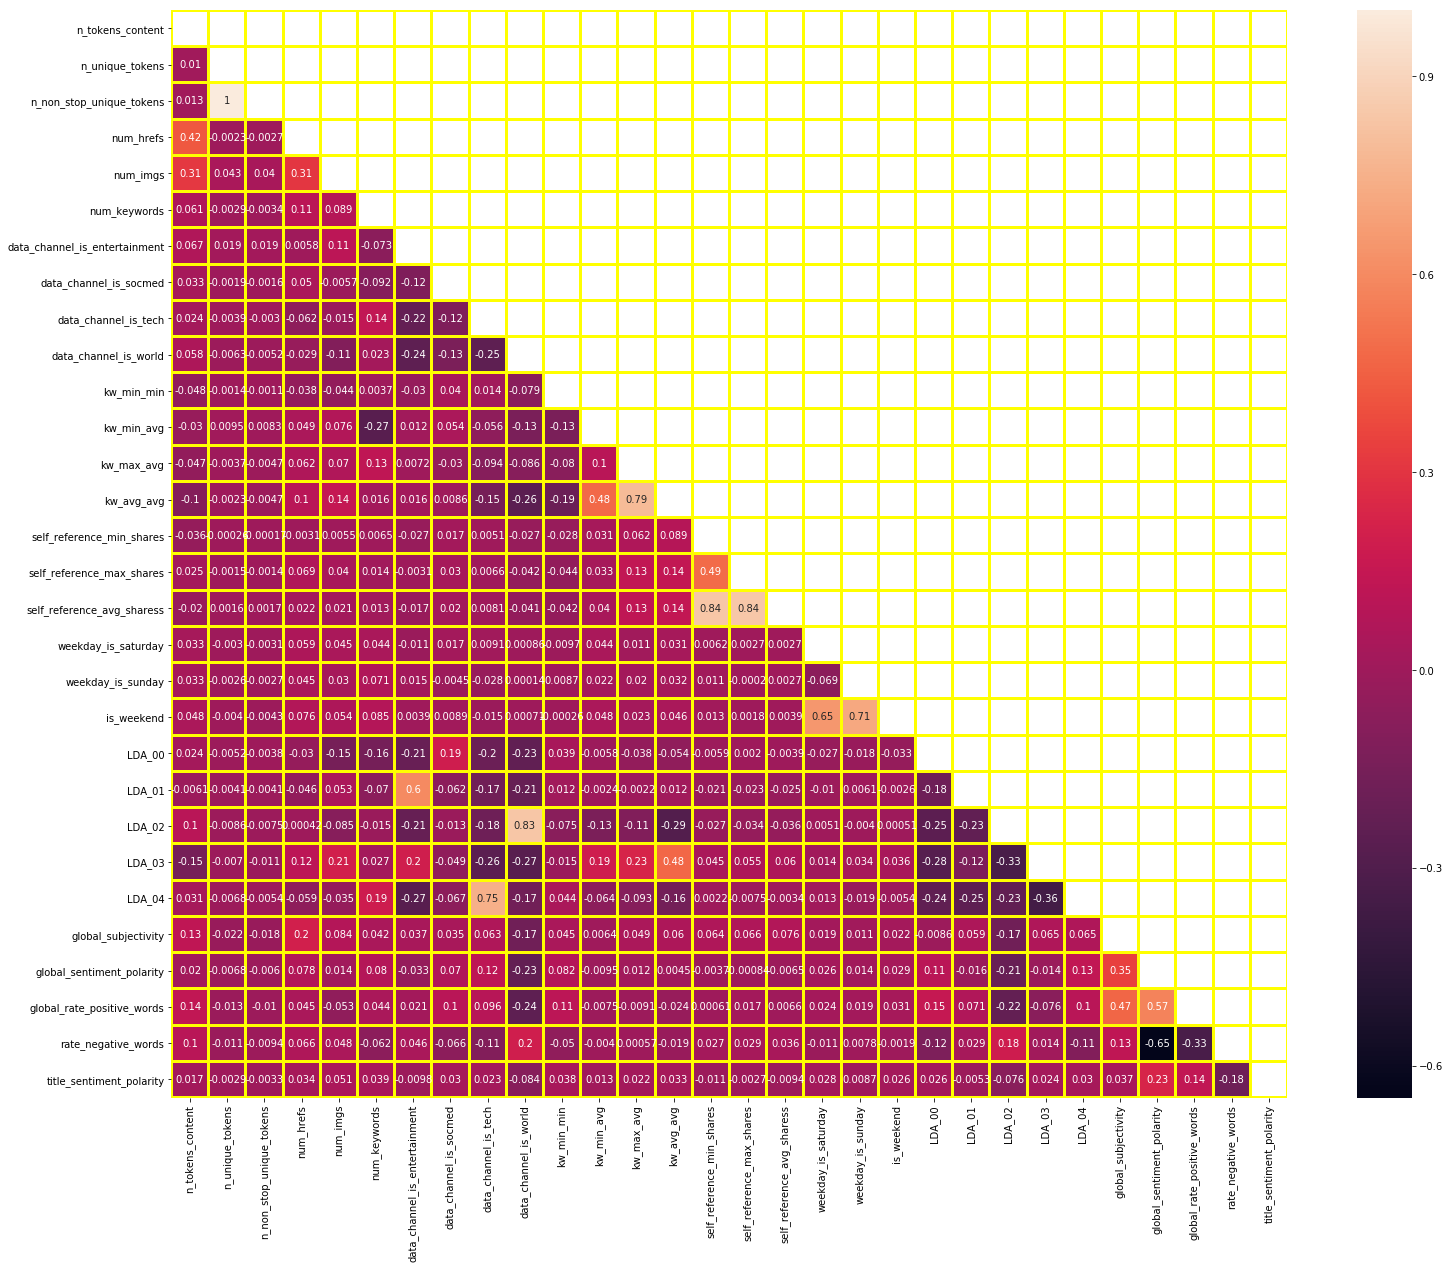

In [166]:
fig, ax1 = plt.subplots(figsize=(25,20))


mask1 = np.zeros_like(X_test_skb.corr(), dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True

sns.heatmap(X_test_skb.corr(), annot=True, linewidths=2, linecolor='yellow', mask=mask1, ax=ax1)
plt.show()


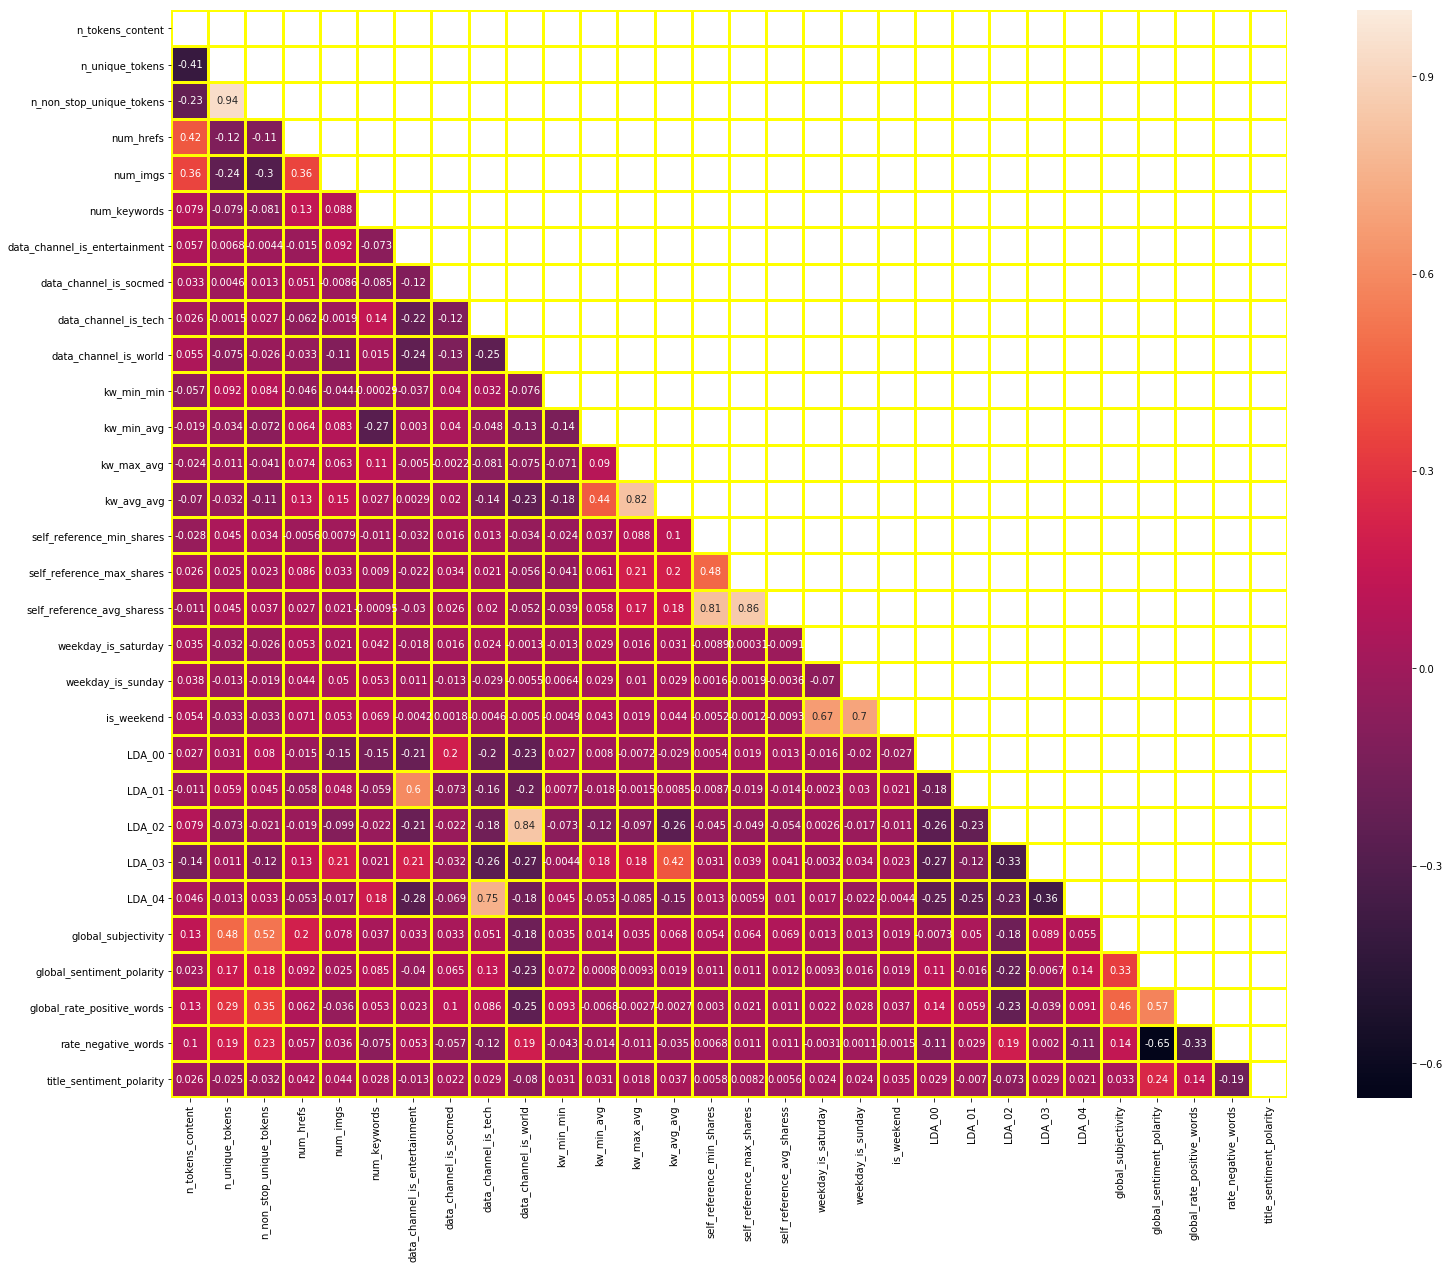

In [168]:
fig, ax2 = plt.subplots(figsize=(25,20))


mask2 = np.zeros_like(X_train_skb.corr(), dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True

sns.heatmap(X_train_skb.corr(), annot=True, linewidths=2, linecolor='yellow', mask=mask2, ax=ax2)
plt.show()

## 8. Hyperparameter Optimization with GridSearch

Fit three logistic regressions on your training set, with the following parameters:

1. A logistic regression with the default hyperparameters, with all features.
2. A logistic regression with the default hyperparameters, with only the features you selected in question 7.
3. A logistic regression using `GridSearchCV` to optimize the following hyperparameters, with only the features you selected in question 7. Print out the hyperparameters selected by `GridSearchCV`
  - `penalty`: should we use l1 or l2 regularization?
  - `C`: how strong should our regularization be?
4. Score each of your fit models against the holdout set. Which model does the best?
5. Print out a confusion matrix for each model. Are there any trends that you see?

In [169]:
lgaf = LogisticRegression()
lgaf.fit(X_train, y_train)

lgsf = LogisticRegression()
lgsf.fit(X_train_skb, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
lggs = LogisticRegression()
params = {'penalty':['l1', 'l2'],
         'C': np.linspace(0.01, 1.0,10)}

In [173]:
gs =GridSearchCV(lggs, params,verbose=2, n_jobs=-1)
gs.fit(X_train_skb, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.01,  0.12,  0.23,  0.34,  0.45,  0.56,  0.67,  0.78,  0.89,  1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [174]:
gs.best_score_

0.65261097097247844

In [176]:
gs.best_params_ # lasso does the best

{'C': 0.12, 'penalty': 'l1'}

In [178]:
gsb = gs.best_estimator_

In [179]:
print('all features:', lgaf.score(X_test, y_test))
print('selected features:', lgsf.score(X_test_skb, y_test))
print('grid search:', gsb.score(X_test_skb, y_test))

all features: 0.592753955515
selected features: 0.635939769166
grid search: 0.643201100665


In [180]:
af_pred = lgaf.predict(X_test)
sf_pred = lgsf.predict(X_test_skb)
gs_pred = gsb.predict(X_test_skb)

In [182]:
from sklearn.metrics import classification_report, confusion_matrix

In [184]:
cf_af = confusion_matrix(y_test, af_pred)
cf_sf = confusion_matrix(y_test,sf_pred)
cf_gs = confusion_matrix(y_test, gs_pred)

In [190]:
cf_af_pd = pd.DataFrame(cf_af,columns=['predicted: 0', 'predicted: 1'],
                       index=['actual: 0', 'actual: 1'])

cf_sf_pd = pd.DataFrame(cf_sf,columns=['predicted: 0', 'predicted: 1'],
                       index=['actual: 0', 'actual: 1'])

cf_gs_pd = pd.DataFrame(cf_gs,columns=['predicted: 0', 'predicted: 1'],
                       index=['actual: 0', 'actual: 1'])

In [191]:
cf_af_pd

,predicted: 0,predicted: 1
actual: 0,4314,2301
actual: 1,3027,3441


In [192]:
cf_sf_pd

,predicted: 0,predicted: 1
actual: 0,3988,2627
actual: 1,2136,4332


In [193]:
cf_gs_pd

,predicted: 0,predicted: 1
actual: 0,4381,2234
actual: 1,2434,4034


## 9. _Bonus_ Continue Optimizing!

In this lab, you're not expected to complete all (or even any) of question 9. However, if you find yourself with extra time, any of these options may lead to a higher score. Modeling is complex and often has a *number* of pathways to go down. This is a small selection  of potential next steps for this dataset.

We have only scratched the surface of how to optimize a model for this dataset. With your remaining time, feel free to optimize in one of a few different ways, making sure that you are using cross-validation to check that your decisions are sound:

1. **Feature Selection**: try a model with a new set of features from the following methods:
    - A higher regularization strength for feature selection via regularization
    - A lower / higher number of features returned by `RFE` or `SelectKBest`
2. **Feature Engineering**: try a model with the following tweaks:
    - Are all the features modeled correctly? Should we create dummy variables or otherwise transform any of the current features?
    - We discarded the `url` feature very early onwards -- is there useful information we could extract from there?
    - Is our decision to predict over/under 1500 shares correct? Do EDA on the original `shares` column to identify if there is a better cutoff.
3. **Model Selection**: 
    - Try a different classification model such as _k_-Nearest Neighbors
    - Is classification even a correct choice here? Could we use a regression model to predict the actual number of shares instead?
4. **Hyperparameter Optimization**: 
    - Continue doing hyperparameter optimization through `GridSearchCV`
    - **Double Bonus**: [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) performs the same parametric search that `GridSearchCV` does, but over a random distribution of hyperparameters (versus user-selected ones). This can be a helpful way to start zeroing in on an area where you may want to try some more targeted grid searching
    - **Triple Bonus**: `GridSearchCV` automatically scores and ranks results based on the default scoring method in each model type ($R^2$ for `LinearRegression`, mean accuracy for `KNeighborsClassifier`, etc.) We can direct `GridSearchCV` to prioritize different metrics, however, such as precision or recall for class 1 or class 0, for example. Do some independent research on the [scoring parameter in sklearn](http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) and try to implement it yourself. Pick two or three metrics and optimize for each. Are the hyperparameters chosen different across each case?
    > **Note**: this is pretty advanced. Try this only if you're _exceptionally_ comfortable with the material this week.